<a href="https://colab.research.google.com/github/eirikngard/Eika/blob/master/Eika_vs_FNO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eikas versjon av Finans Norges klimarapport 2020
https://www.finansnorge.no/siteassets/statistikk/artikkel/2020/lansering-klimarapport/finans-norges-klimarapport-2020.pdf

## Hovedoversikt over værerlaterte vannskader og skader i naturskadepoolen

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

In [3]:

uploaded = files.upload()
#fno_værrelatert_vannskade_2010-2019.csv and fno_værrelatert_vannskade_2010-2019_inkl_lyd.csv

Saving fno_værrelatert_vannskade_2010-2019.csv to fno_værrelatert_vannskade_2010-2019 (1).csv
Saving fno_værrelatert_vannskade_2010-2019_inkl_lyd.csv to fno_værrelatert_vannskade_2010-2019_inkl_lyd.csv


### Leser total skadekost værrealterte vannskader fra 2010-2019
(Tilstopp, frost og vann utenfra)

In [4]:
kol = ['årsak','år','skade']
kol2 = ['år','skade', 'årsak']
vær = pd.read_csv('fno_værrelatert_vannskade_2010-2019.csv',sep=',',skiprows=1,names=kol)
værlyn = pd.read_csv('fno_værrelatert_vannskade_2010-2019_inkl_lyd.csv',sep=',',skiprows=1,names=kol2)

In [6]:
ård = np.arange(2010,2020,1) #2010-2019
testr = []; værtot = []
for i in ård:
  test = vær.loc[vær['år']==i,'skade'].sum()
  værtot1 = værlyn.loc[værlyn['år']==i,'skade'].sum()
  værtot.append(værtot1*(10**(-6)))
  testr.append(test*(10**(-6)))
testr
sum_vær=round(np.sum(testr),1)
sum_lyn=round(np.sum(værtot),1)

pool = np.array([6.2,59.9,49.4,26.2,33.3,49.4,19.3,21.8,15.7,17.1]) 
#skader fra Naturskader_2010-2019 i M:\02 Risk Management\Naturkatastrofe\Kartlegging Klimarisiko\Naturskade
sum_pool=np.sum(pool)

In [145]:
værtot1

63840250.379999995

In [143]:
pool22 = np.array([6.2,59.9,49.4,26.2,33.3,49.4,19.3,21.8,15.7,17.1]) 

2981*0.0328/2
1934*0.0328/2
sum_lyn

800.9

In [8]:
#Plot-sizes 
labelsize=15
titelsize=20

In [9]:
lyn = round((værlyn.loc[værlyn['årsak']=='Lynnedslag','skade'].sum())*10**(-6),1)
lyn

152.0

# Farger

In [10]:
grønn = '#84BD00'
blå = '#60C3E6'
grå = '#6E6259'
blå1='#3396b9'
rød='#7f3035'
sjøgrønn='#004f59'

In [11]:
colo = ['#60C3E6','#84BD00','#6E6259']

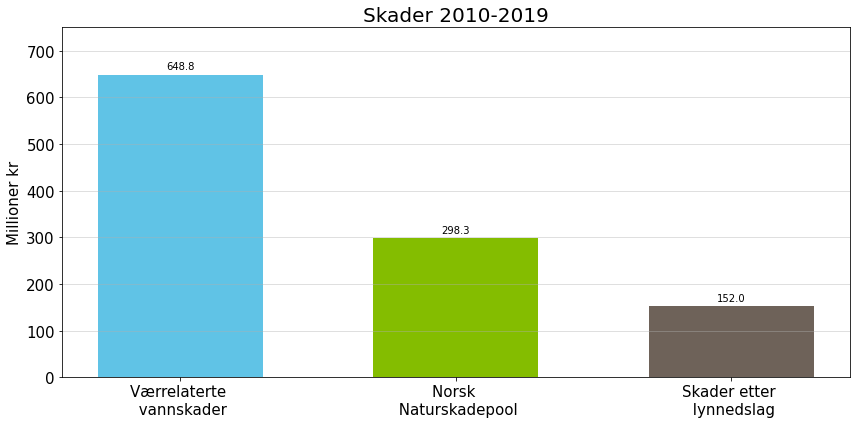

In [12]:
labels = ['Værrelaterte \n vannskader','Norsk \n Naturskadepool', 'Skader etter \n lynnedslag']
data = [sum_vær,sum_pool, lyn]
colo = [blå,grønn,grå]

x = np.arange(len(labels))  # the label locations
width = .60  # the width of the bars

fig, ax = plt.subplots(figsize = (12,6))
bar1 = ax.bar(x, data, width, color=colo)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Millioner kr', size=labelsize)
ax.set_title('Skader 2010-2019',size=titelsize)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,750)
ax.grid(axis='y',alpha=0.5)
ax.tick_params(axis = 'both', which = 'major', labelsize = labelsize)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bar1)
fig.tight_layout()
plt.show()

### Kakediagram total skadekost vaæærealterte vannskader og ppolskader

**Prosentvis forskjell fra FNO**

In [18]:
fno1 = {'Vær':16255,'Nat':11766,'Lyn':2194} #kilde: https://www.finansnorge.no/statistikk/skadeforsikring/klimarelaterte-skader/hovedoversikt-klima/
fno1['Vær']
fno = [16255,11766,2194]

In [17]:
data

[648.8, 298.3, 152.0]

In [73]:
fno_per = []
data_per = []
print('Eika')
for i in data:
  print(i/sum(data)*100)
  data_per.append(round(i/sum(data)*100,1))
print('-----------')
print('FNO')
for k in fno:
  print(k/sum(fno)*100)
  fno_per.append(round(k/sum(fno)*100,1))

  data = [sum_vær,sum_pool, lyn]

Eika
59.030115549085615
27.14038758984624
13.829496861068147
-----------
FNO
53.79778255833195
38.94092338242594
7.261294059242099


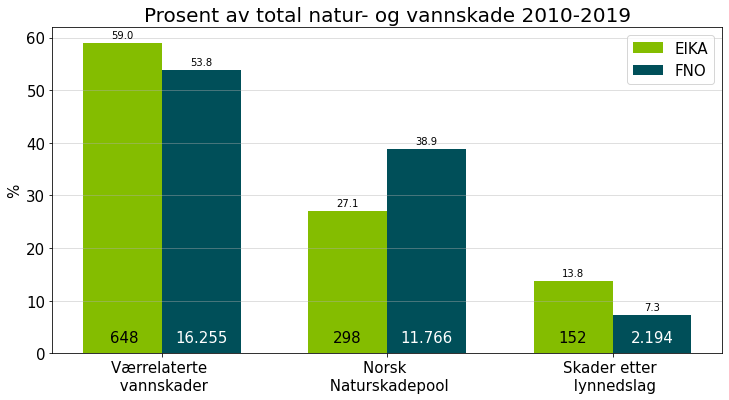

In [147]:
fig, ax = plt.subplots(figsize = (12,6))
N=3
ind = np.arange(N)
lab = [19,14,25]
width=0.35
grønn2 = '#61A100'
bar1 = ax.bar(x, data_per, width, color='#84BD00',label='EIKA')
bar2 = ax.bar(x+width, fno_per, width, color='#004f59', label='FNO')

ax.set_xticks(ind + width / 2)
labels = ['Værrelaterte \n vannskader','Norsk \n Naturskadepool', 'Skader etter \n lynnedslag']
ax.set_xticklabels(labels)
autolabel(bar1)
autolabel(bar2)
fontsize=15
def addtext(ax, props):
    ax.text(0.01, 3, str(int(sum_vær)), props, rotation=0,fontsize=fontsize)
    ax.text(0.35, 3, str(16.255), props, rotation=0,color='white',fontsize=fontsize)
    ax.text(1, 3, str(int(sum_pool)), props, rotation=0,fontsize=fontsize)
    ax.text(1.35, 3, str(11.766), props, rotation=0,color='white',fontsize=fontsize)
    ax.text(2, 3, str(int(lyn)), props, rotation=0,fontsize=fontsize)
    ax.text(2.35, 3, str(2.194), props, rotation=0,color='white',fontsize=fontsize)

bbox = {'fc': '0.8', 'pad': 6}
addtext(ax, {'ha': 'center', 'va': 'center'})#, 'bbox': bbox})
#axs[0].set_ylabel('center / center')

ax.set_ylabel('%', size=labelsize)
ax.set_title('Prosent av total natur- og vannskade 2010-2019',size=titelsize)
#ax.set_ylim(0,65)
ax.grid(axis='y',alpha=0.5)
ax.tick_params(axis = 'both', which = 'major', labelsize = labelsize)

#ax.autoscale_view()
ax.legend(prop={'size': 15})
plt.show()


In [140]:
lyn

152.0

# Her må du få med lyn også!! samme ovenfor 

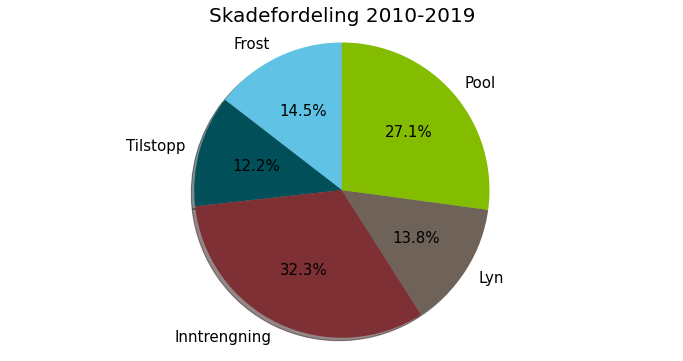

In [ ]:

frost = (vær.loc[vær['årsak']=='Frost','skade'].sum())*10**(-6)
tilstopp = (vær.loc[vær['årsak']=='Tilstopping','skade'].sum())*10**(-6)
inntre = (vær.loc[vær['årsak']=='Vann utenfra','skade'].sum())*10**(-6)
lyn = (værlyn.loc[værlyn['årsak']=='Lynnedslag','skade'].sum())*10**(-6)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:\n",
labels = 'Frost', 'Tilstopp', 'Inntrengning','Lyn','Pool'#, 'Nat.skade ikke pool'\n",
sizes = [frost,tilstopp,inntre,lyn,sum_pool]#,snitt4]\n",
explode = (0, 0, 0, 0,0)  # only \"explode\" the 2nd slice (i.e. 'Hogs')\n",
#colors = ['royalblue','lightsteelblue','cornflowerblue','goldenrod','limegreen']
colors = [blå,sjøgrønn,rød,grå,grønn]
fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes, explode=explode,labels=labels,colors=colors, autopct='%1.1f%%', shadow=True, 
        startangle=90,textprops={'fontsize': labelsize})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.\n",
ax1.set_title('Skadefordeling 2010-2019',size=20)
plt.show()

#her er poolen grønn fordi det ikke er skilt på hvilke skadeårsaker innad i poolen.
#tallene som er bruk for pool er bare totale skadetall per år (2010-2019)

## Utvikling i erstatning pool og værrealtert

In [ ]:
uploaded = files.upload()
#fno_værrelatert_vannskade_2000-2020.csv

Saving fno_værrelatert_vannskade_2000-2020.csv to fno_værrelatert_vannskade_2000-2020.csv


In [ ]:
kol = ['år','årsak','skade']
vær2000 = pd.read_csv('fno_værrelatert_vannskade_2000-2020.csv',sep=',',skiprows=1,names = kol)
vær2000

In [ ]:
årn = np.arange(2000,2021,1) #2010-2019
skader = []; 
for i in årn:
  test = vær2000.loc[vær2000['år']==i,'skade'].sum()
  skader.append(test*(10**(-6)))
skader

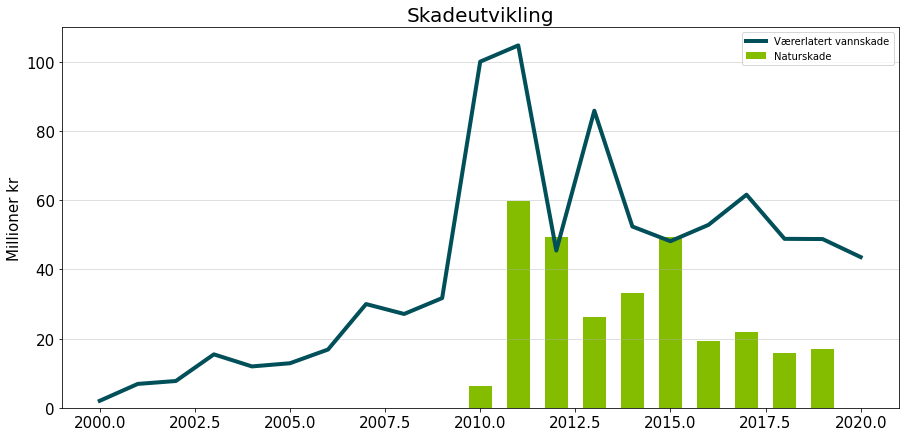

In [ ]:
fig, ax = plt.subplots(figsize = (15,7))
ax.plot(årn,skader,linewidth=4, color=sjøgrønn,label='Værerlatert vannskade')
#ax.plot(ård,pool,linewidth=4, color='limegreen')
bar = ax.bar(ård, pool, width, color=grønn,label='Naturskade')
#bar = ax.bar(årn, skader, width, color='royalblue',alpha=0.3)
ax.set_title('Skadeutvikling',size=titelsize)
ax.tick_params(axis = 'both', which = 'major', labelsize = labelsize)
ax.set_ylabel('Millioner kr', size=labelsize)
ax.grid(axis='y',alpha=0.5)
plt.legend()
plt.show()

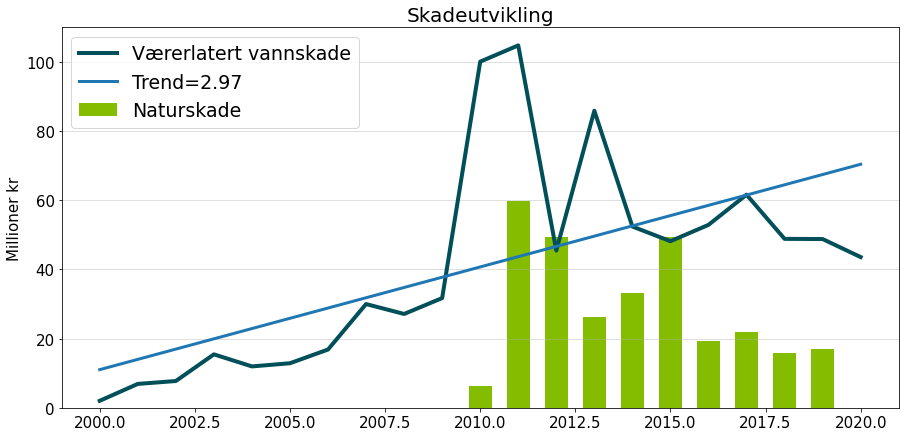

In [ ]:
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det


fig, ax = plt.subplots(figsize = (15,7))
ax.plot(årn,skader,linewidth=4, color=sjøgrønn,label='Værerlatert vannskade')
#ax.plot(ård,pool,linewidth=4, color='limegreen')
a,b = linreg(range(len(skader)),skader)  #//x=skade
trendline=[a*index + b for index in range(len(årn))]
trend=round(a,2)
plt.plot(årn,trendline,label="Trend="+str(trend),linewidth=3)
bar = ax.bar(ård, pool, width, color=grønn,label='Naturskade')
#bar = ax.bar(årn, skader, width, color='royalblue',alpha=0.3)
ax.set_title('Skadeutvikling',size=titelsize)
ax.tick_params(axis = 'both', which = 'major', labelsize = labelsize)
ax.set_ylabel('Millioner kr', size=labelsize)
ax.grid(axis='y',alpha=0.5)
plt.legend(loc = 2, prop={'size': 19})
plt.show()

## Utvikling i erstatning etter vannskader som følge av nedbør

In [ ]:
uploaded = files.upload()
#vannskade_delta_år_tilstopp.csv, vannskade_delta_år_inntrengning.csv, vannskade_delta_år_frost.csv

Saving vannskade_delta_år_frost.csv to vannskade_delta_år_frost.csv
Saving vannskade_delta_år_inntrengning.csv to vannskade_delta_år_inntrengning.csv
Saving vannskade_delta_år_tilstopp.csv to vannskade_delta_år_tilstopp.csv


In [ ]:
col = ['år','årsak','skade'] 
år2 = np.arange(2000,2021,1)

In [ ]:
til= pd.read_csv('vannskade_delta_år_tilstopp.csv',header=None,skiprows=1,names=col)
inn= pd.read_csv('vannskade_delta_år_inntrengning.csv',header=None,skiprows=1,names=col)
frost= pd.read_csv('vannskade_delta_år_frost.csv',header=None,skiprows=1,names=col)

In [ ]:
data_frost = []; data_til = []; data_inn = [];

for i in år2:
  frost1 = frost.loc[frost['år']==i,'skade'].sum()
  inn1 = inn.loc[inn['år']==i,'skade'].sum()
  til1 = til.loc[til['år']==i,'skade'].sum()

  data_frost.append(frost1)
  data_inn.append(inn1)
  data_til.append(til1)
#løse problem med aksenavn, multipliser alle verdier med faktor\n",
new_frost = np.array([i*(10**(-6)) for i in data_frost])
new_inn = np.array([i*(10**(-6)) for i in data_inn])
new_til = np.array([i*(10**(-6)) for i in data_til])

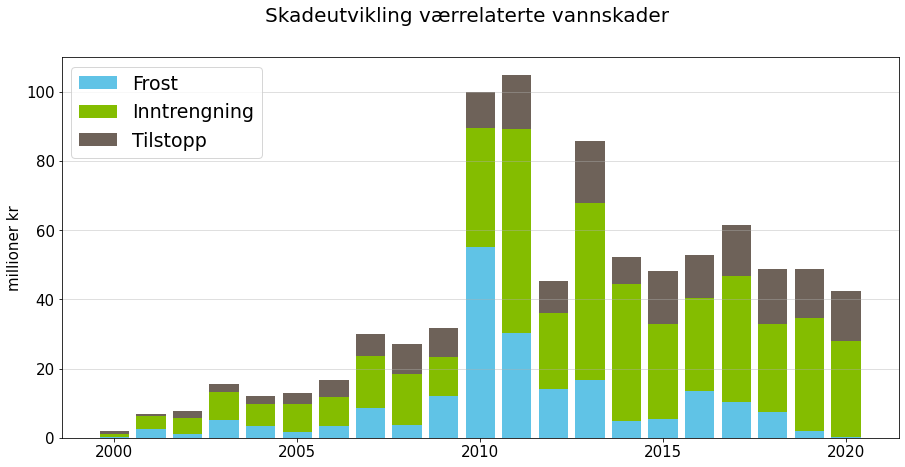

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle('Skadeutvikling værrelaterte vannskader',fontsize=20)

ax.bar(år2, new_frost, color=blå,label='Frost')
ax.bar(år2, new_inn,bottom=new_frost,color=grønn, label='Inntrengning')
ax.bar(år2, new_til, bottom= new_frost+new_inn,color=grå, label='Tilstopp')

ax.grid(axis='y',alpha=0.5)
ax.set_ylabel('millioner kr',size=15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.legend(loc = 2, prop={'size': 19}) ;plt.show()

## Månedsfordelt erstatning værrelaterte vannskader

In [ ]:
uploaded = files.upload()
#fno_værrealtert_vannskade_mnd.csv

Saving fno_værrealtert_vannskade_mnd.csv to fno_værrealtert_vannskade_mnd.csv


In [ ]:
col = ['mnd','skade','årsak']
alt = pd.read_csv('fno_værrealtert_vannskade_mnd.csv', header=None,skiprows=2,names=col)

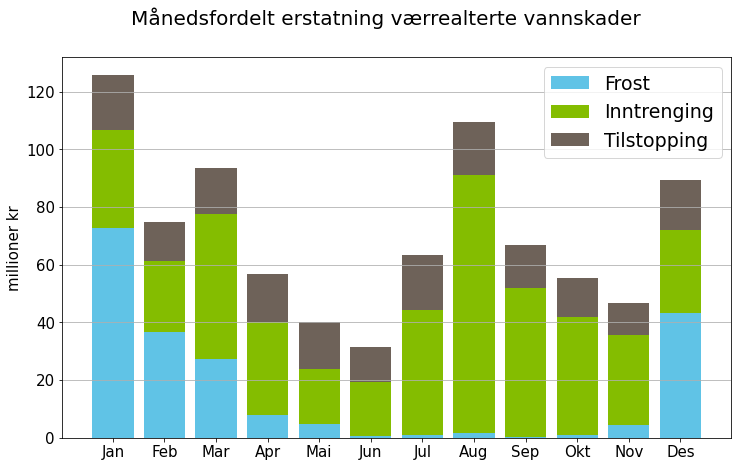

In [ ]:
mnd = ['Jan','Feb','Mar','Apr','Mai','Jun','Jul','Aug','Sep','Okt','Nov','Des']

a = np.array([i*(10**(-6)) for i in alt.loc[alt['årsak']=='Frost','skade']])
b = np.array([i*(10**(-6)) for i in alt.loc[alt['årsak']=='Tilstopping','skade']])
c = np.array([i*(10**(-6)) for i in alt.loc[alt['årsak']=='Vann utenfra','skade']])

fig, ax = plt.subplots(figsize=(12, 7))
fig.suptitle('Månedsfordelt erstatning værrealterte vannskader',fontsize=20)

bar=ax.bar(mnd, a,color=blå, label='Frost')
bar=ax.bar(mnd, c,bottom=a,color=grønn, label='Inntrenging')
bar=ax.bar(mnd, b, bottom= a+c,color=grå, label='Tilstopping')

ax.grid(axis='y')
ax.set_ylabel('millioner kr',size=15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.legend(loc = 1, prop={'size': 19})
plt.show()

In [ ]:
sum(a)+sum(b)+sum(c)

853.9766504599999

In [ ]:
#Samme, bare at 2010-2020
uploaded = files.upload()
col = ['mnd','skade','årsak']
alt = pd.read_csv('vannskade_mnd_2010_2020.csv', header=None,skiprows=1,names=col)

Saving vannskade_mnd_2010_2020.csv to vannskade_mnd_2010_2020 (3).csv


In [ ]:
alt

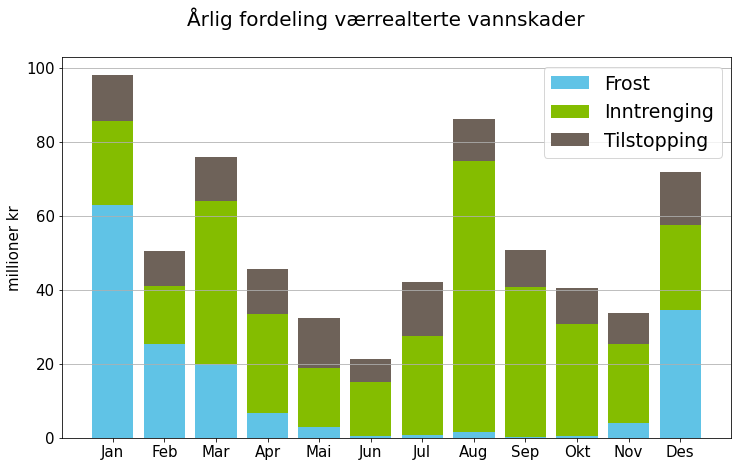

In [ ]:
mnd = ['Jan','Feb','Mar','Apr','Mai','Jun','Jul','Aug','Sep','Okt','Nov','Des']

a = np.array([i*(10**(-6)) for i in alt.loc[alt['årsak']=='Frost','skade']])
b = np.array([i*(10**(-6)) for i in alt.loc[alt['årsak']=='Tilstopping','skade']])
c = np.array([i*(10**(-6)) for i in alt.loc[alt['årsak']=='Vann utenfra','skade']])

fig, ax = plt.subplots(figsize=(12, 7))
fig.suptitle('Årlig fordeling værrealterte vannskader',fontsize=20)

bar=ax.bar(mnd, a,color=blå, label='Frost')
bar=ax.bar(mnd, c,bottom=a,color=grønn, label='Inntrenging')
bar=ax.bar(mnd, b, bottom= a+c,color=grå, label='Tilstopping')

ax.grid(axis='y')
ax.set_ylabel('millioner kr',size=15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.legend(loc = 1, prop={'size': 19})
plt.show()

In [ ]:
sum(a)+sum(b)+sum(c)

648.22294784

In [ ]:
 alt.loc[alt['årsak']=='Vann utenfra','skade']

1     22631344.00
4     15660529.01
7     43964801.60
10    26865512.32
13    15937824.00
16    14560007.03
19    26809277.50
22    73166730.22
25    40323713.83
28    30297799.72
31    21379082.15
34    22989537.98
Name: skade, dtype: float64

## Månedlig fordeling av lynskader

In [ ]:
uploaded = files.upload()
#fno_lyn_mnd_2010-2019.csv

Saving fno_lyn_mnd_2010-2019.csv to fno_lyn_mnd_2010-2019.csv


In [ ]:
kol = ['mnd','skade','årsak']
lyn = pd.read_csv('fno_lyn_mnd_2010-2019.csv',names=kol, skiprows=1)
#lyn

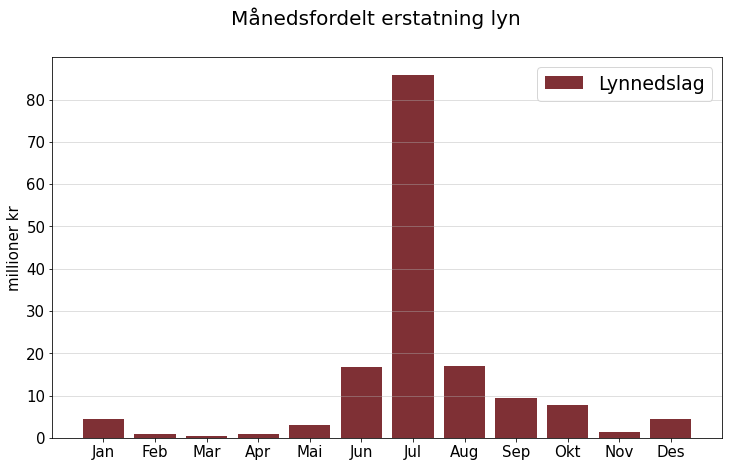

In [ ]:
mnd = ['Jan','Feb','Mar','Apr','Mai','Jun','Jul','Aug','Sep','Okt','Nov','Des']

a = np.array([i*(10**(-6)) for i in lyn.loc[lyn['årsak']=='Lynnedslag','skade']])

fig, ax = plt.subplots(figsize=(12, 7))
fig.suptitle('Månedsfordelt erstatning lyn',fontsize=20)

bar=ax.bar(mnd, a,color=rød, label='Lynnedslag')
ax.grid(axis='y',alpha=0.5)
ax.set_ylabel('millioner kr',size=15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.legend(loc = 1, prop={'size': 19})
plt.show()

In [ ]:
sum(a)

152.04293165

In [ ]:
600*40

24000

### Stacked barplot med fylkesvis oversikt for både værrelaterte- og naturskader. 

In [ ]:
uploaded = files.upload()

Saving fno_værrelatert_vannskade_2010-2019_fylke_frost.csv to fno_værrelatert_vannskade_2010-2019_fylke_frost.csv
Saving fno_værrelatert_vannskade_2010-2019_fylke_inntrengning.csv to fno_værrelatert_vannskade_2010-2019_fylke_inntrengning.csv
Saving fno_værrelatert_vannskade_2010-2019_fylke_tilstopp.csv to fno_værrelatert_vannskade_2010-2019_fylke_tilstopp.csv


In [ ]:
kol = ['fylke','skade','årsak']
frost = pd.read_csv('fno_værrelatert_vannskade_2010-2019_fylke_frost.csv',header=None,skiprows=1,names=kol)
intre = pd.read_csv('fno_værrelatert_vannskade_2010-2019_fylke_inntrengning.csv',header=None,skiprows=1,names=kol)
tilstopp = pd.read_csv('fno_værrelatert_vannskade_2010-2019_fylke_tilstopp.csv',header=None,skiprows=1,names=kol)

In [ ]:
dfrost = []; dinn = []; dtil = []; 
fylker = ['Østfold','Akershus','Oslo','Hedmark', 'Oppland','Buskerud', 'Vestfold',
          'Telemark', 'Aust-Agder','Vest-Agder','Rogaland','Hordaland',
          'Sogn og Fjordane','Møre og Romsdal', 'Trøndelag', 'Nordland',
            'Troms fylke', 'Finnmark Finnmárku']
fylklabel = ['Østfold','Akershus','Oslo','Hedmark', 'Oppland','Buskerud', 'Vestfold',
          'Telemark', 'Aust-Agder','Vest-Agder','Rogaland','Hordaland',
          'Sogn og Fjordane','Møre og Romsdal', 'Trøndelag', 'Nordland',
            'Troms', 'Finnmark']
for i in fylker:
  dfrost += [(frost.loc[frost['fylke']==i,'skade'].sum())*10**(-6)]
  dtil += [(tilstopp.loc[tilstopp['fylke']==i,'skade'].sum())*10**(-6)]
  dinn += [(intre.loc[intre['fylke']==i,'skade'].sum())*10**(-6)]

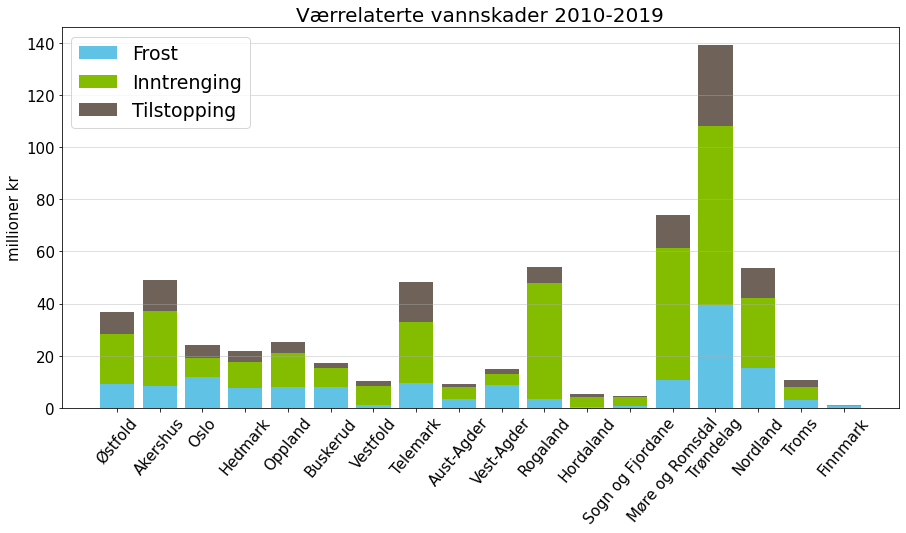

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))

bar=ax.bar(fylklabel, np.array(dfrost),color=blå, label='Frost')
bar=ax.bar(fylklabel, np.array(dinn),bottom=np.array(dfrost),color=grønn, label='Inntrenging')
bar=ax.bar(fylklabel, np.array(dtil), bottom=np.array(dinn)+np.array(dfrost),color=grå, label='Tilstopping')

ax.tick_params(axis='x',rotation=50,labelsize=labelsize)
ax.tick_params(axis='y',labelsize=15)
ax.set_ylabel('millioner kr',size=15)
ax.set_title('Værrelaterte vannskader 2010-2019',size=titelsize)
ax.grid(axis='y',alpha=0.5)
ax.legend(loc = 2, prop={'size': 19})
plt.show()

In [ ]:
sum(dfrost)+sum(dtil)+sum(dinn)

598.29308938

### Samme for lyn

In [ ]:
uploaded = files.upload()

Saving fno_værrelatert_vannskade_2010-2019_fylke_lyn.csv to fno_værrelatert_vannskade_2010-2019_fylke_lyn.csv


In [ ]:
kol = ['fylke','type','skade','årsak']
lyn = pd.read_csv('fno_værrelatert_vannskade_2010-2019_fylke_lyn.csv',header=None,names=kol,skiprows=1)
lyn

In [ ]:
dlyn = []
for i in fylker:
  dlyn += [(lyn.loc[lyn['fylke']==i,'skade'].sum())*10**(-6)]

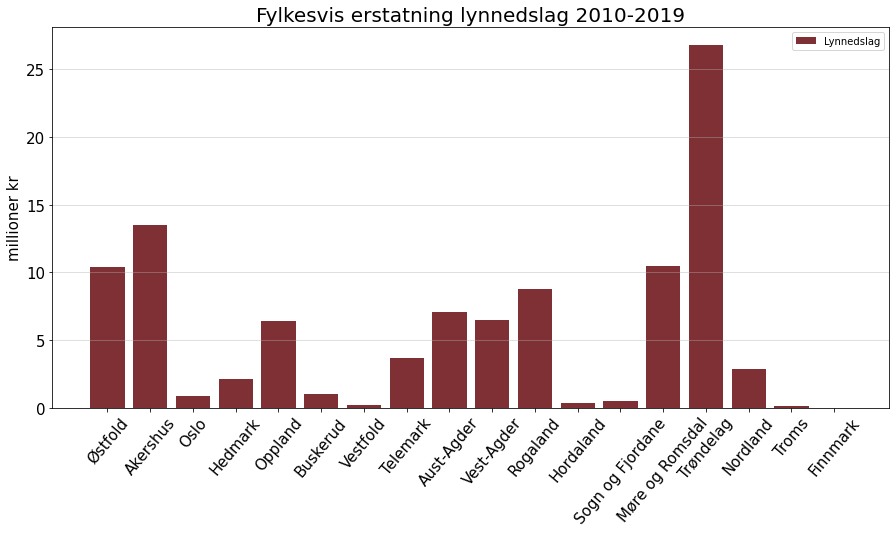

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))

bar=ax.bar(fylklabel, np.array(dlyn),color=rød, label='Lynnedslag')

ax.tick_params(axis='x',rotation=50,labelsize=labelsize)
ax.tick_params(axis='y',labelsize=15)
ax.set_ylabel('millioner kr',size=15)
ax.set_title('Lynnedslag 2010-2019',size=titelsize)
ax.grid(axis='y',alpha=0.5)
ax.legend(loc = 2, prop={'size': 19})
plt.show()

In [ ]:
sum(dlyn)

101.66874855

In [ ]:
uploaded = files.upload()

Saving fno_værrelatert_frost_per_skade_2010-2019.csv to fno_værrelatert_frost_per_skade_2010-2019.csv
Saving fno_værrelatert_inntrengning_per_skade_2010-2019.csv to fno_værrelatert_inntrengning_per_skade_2010-2019.csv
Saving fno_værrelatert_tilstopp_per_skade_2010-2019.csv to fno_værrelatert_tilstopp_per_skade_2010-2019.csv


In [ ]:
kol = ['skade','årsak','ant']
inn= pd.read_csv('fno_værrelatert_inntrengning_per_skade_2010-2019.csv',names=kol,skiprows=1)
frost = pd.read_csv('fno_værrelatert_frost_per_skade_2010-2019.csv',names=kol,skiprows=1)
til = pd.read_csv('fno_værrelatert_tilstopp_per_skade_2010-2019.csv',names=kol,skiprows=1)

In [ ]:
inntot = inn['skade'].sum() #summert skadekost fra 2010-2019
frosttot = frost['skade'].sum()
tiltot = til['skade'].sum()

inncount = 1188+1069+816+866+754+849+773+647+904+519 #finn en anne måte å summer disse str på
frostcount = 942+235+378+148+116+41+186+60+70+43
tilcount = 287+354+264+292+333+332+248+259+207+226
#vil ha stærrelsene relativt til total utbetaling
innsnitt = inntot/inncount
frostsnitt = frosttot/frostcount
tilsnitt = tiltot/tilcount

In [ ]:
poolcount = 45+246+35+112+71+196+22+109+77+40+2+25+15+14+12+8+8+9+14+10+36+1506+108+795+197+477+419+191+232+298+243+5+9 #alle ant skader fra PowerBI naturskade
pool = np.array([6.2,59.9,49.4,26.2,33.3,49.4,19.3,21.8,15.7,17.1]) #skader fra Eeirik fra 2010-2019
pooltot=np.sum(pool)*10**6
poolsnitt=pooltot/poolcount
poolsnitt

53401.360544217685

Text(1302, 31938.80675945754, 'Tilstopp')

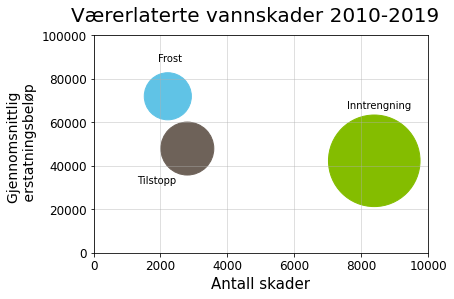

In [ ]:
fig, ax = plt.subplots()
fig.suptitle('Værerlaterte vannskader 2010-2019',size=titelsize)
x = [inncount, frostcount, tilcount]#, poolcount]
y = [innsnitt, frostsnitt, tilsnitt]#, poolsnitt]
n = ['Inntrengning','Frost','Tilstopp']#,'Pool OBS']
colo = [grønn,blå,grå]#,'limegreen']
ax.scatter(x,y,color=colo,s=x)
ax.set_ylim(0,100000)
ax.set_xlim(0,10000)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.set_ylabel('Gjennomsnittlig \n erstatningsbeløp', size = 14)
ax.set_xlabel('Antall skader',size = labelsize)
#ax.set_title('Værerlaterte vannskader 2010-2019',size=titelsize)
ax.grid(axis='both',alpha=0.5)

ax.annotate(n[0], (x[0], y[0]),xytext=(x[0]-800, y[0]+24000))
ax.annotate(n[1], (x[1], y[1]),xytext=(x[1]-300, y[1]+16000))
ax.annotate(n[2], (x[2], y[2]),xytext=(x[2]-1500, y[2]-16000))

### Enkel lineær regresjon på naturskadene 

In [ ]:
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det

In [ ]:
pool

array([ 6.2, 59.9, 49.4, 26.2, 33.3, 49.4, 19.3, 21.8, 15.7, 17.1])

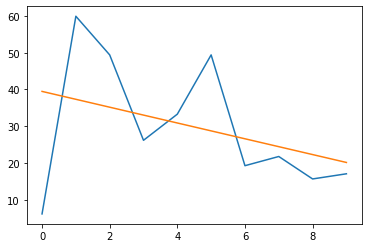

In [ ]:
#snitt = np.mean(i)

a,b = linreg(range(len(pool)),pool)  #//x=skade
trendline=[a*index + b for index in range(len(pool))]
trend=round(a,2)
trend
plt.plot(pool)
plt.plot(trendline)
plt.show()

In [ ]:
trend

-2.14